In [1]:
import math
from top2vec import Top2Vec
import numpy as np
import pandas as pd
import umap
from csv import writer
#import umap.plot
import matplotlib.pyplot as plt

/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/uma

In [3]:
file = 'top2vec_umap_n_n15_hdbscan_m_c_s15_doc2vec_new' #_NOV_COL_MEM_VER
#file = 'top2vec_original_setting_new_NOV_COL_VER'
fiction = False
folder = 'whole books  NOV COL MEM VER' if fiction else 'whole books'
file_ending = "_NOV_COL_VER" if fiction else ''

df_path = 'data/results/top2vec/{folder}/{file}.xlsx'.format(folder = folder, file = file) #  NOV COL MEM VER
model_path = 'models/{folder}/top2vec/{file}'.format(folder = folder, file = file) #  NOV COL MEM VER
#df = pd.read_excel(df_path)
## Load the model
top2vec_model = Top2Vec.load(model_path)

In [16]:
from collections import defaultdict

# Number of clusters
topic_sizes, topic_nums_original = top2vec_model.get_topic_sizes()

documents_topics = {}

for topic_num in topic_nums_original: 

        # Get documents that are part of the topic
        documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=topic_num, num_docs=1)

        documents_topics[document_ids[0]] = [topic_num]

# Reduce clusters
for i in reversed(range(2, max(topic_nums_original)+1)):
    ret = top2vec_model.hierarchical_topic_reduction(num_topics=i)

    topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
 
    for key in documents_topics.keys():
            
            topic, _, _, _ = top2vec_model.get_documents_topics(doc_ids = [key], reduced = True)

            documents_topics[key].append(topic[0])    

print([f'{key}: {documents_topics[key][0]}' for key in documents_topics.keys()])  
print(documents_topics.keys())    
for i in range((len(documents_topics[24]))):
       temp_document_topic = defaultdict(lambda: [])
       for  key in documents_topics.keys():
            temp_document_topic[documents_topics[key][i]].append(key) 
       print([f'{key}: {temp_document_topic[key]}' for key in temp_document_topic.keys()])     
       #    



['24: 0', '319: 1', '631: 2', '562: 3', '788: 4', '112: 5', '1304: 6', '950: 7', '657: 8', '1062: 9', '1162: 10', '1066: 11', '1071: 12', '1257: 13', '1139: 14', '1135: 15', '917: 16']
dict_keys([24, 319, 631, 562, 788, 112, 1304, 950, 657, 1062, 1162, 1066, 1071, 1257, 1139, 1135, 917])
['0: [24]', '1: [319]', '2: [631]', '3: [562]', '4: [788]', '5: [112]', '6: [1304]', '7: [950]', '8: [657]', '9: [1062]', '10: [1162]', '11: [1066]', '12: [1071]', '13: [1257]', '14: [1139]', '15: [1135]', '16: [917]']
['0: [24]', '1: [319]', '2: [631]', '4: [562]', '3: [788, 917]', '5: [112]', '6: [1304]', '7: [950]', '9: [657]', '10: [1062]', '8: [1162]', '12: [1066]', '11: [1071]', '13: [1257]', '15: [1139]', '14: [1135]']
['0: [24]', '1: [319]', '2: [631]', '4: [562]', '3: [788, 917]', '5: [112]', '7: [1304]', '8: [950]', '10: [657]', '11: [1062]', '9: [1162]', '6: [1066, 1135]', '12: [1071]', '13: [1257]', '14: [1139]']
['0: [24]', '1: [319]', '3: [631]', '4: [562]', '2: [788, 917]', '6: [112]', '

In [25]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt


mat = np.array([[0.0, 2.0, 0.1], [2.0, 0.0, 2.0], [0.1, 2.0, 0.0]])
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=["0", "1", "2"])
plt.title("test")
plt.show()


array([], dtype=float64)

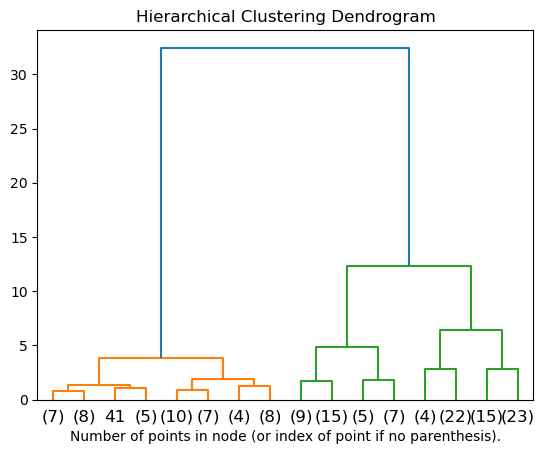

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [28]:
model

AgglomerativeClustering(distance_threshold=0, n_clusters=None)